In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [8]:
fashion_set = keras.datasets.fashion_mnist.load_data()
fashion_set

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [5]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


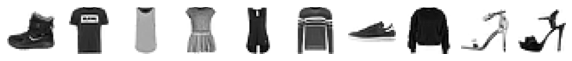

In [6]:
fig, axs =plt.subplots(1,10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [7]:
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [14]:
pd.Series(train_target).value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

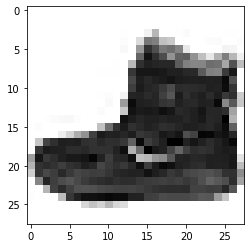

In [18]:
plt.imshow(train_input[0], cmap='gray_r')

In [9]:
train_input

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [48]:
x_train = train_input.reshape(60000, 28*28)
x_test = test_input.reshape(10000, 28*28)
y_train = train_target
y_test = test_target

In [49]:
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_test_oh = tf.keras.utils.to_categorical(y_test)

In [50]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
pred = log.predict(x_test)
log.score(x_test, y_test)

MemoryError: Unable to allocate 359. MiB for an array with shape (60000, 784) and data type float64

In [39]:
model = Sequential()
model.add(Dense(125, input_dim=28*28, activation='relu'))
model.add(Dense(56, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 125)               98125     
                                                                 
 dense_4 (Dense)             (None, 56)                7056      
                                                                 
 dense_5 (Dense)             (None, 10)                570       
                                                                 
Total params: 105,751
Trainable params: 105,751
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [44]:
y_train_oh.shape
x_train.shape

(60000, 784)

In [45]:
hist = model.fit(x_train, y_train_oh, validation_split=0.2, epochs=50, batch_size=20)

Epoch 1/50
2400/2400 [==============================] - 9s 3ms/step - loss: 2.0284 - accuracy: 0.7443 - val_loss: 0.6810 - val_accuracy: 0.7972
Epoch 2/50
2400/2400 [==============================] - 8s 3ms/step - loss: 0.6184 - accuracy: 0.7981 - val_loss: 0.6116 - val_accuracy: 0.7983
Epoch 3/50
2400/2400 [==============================] - 7s 3ms/step - loss: 0.5397 - accuracy: 0.8165 - val_loss: 0.4836 - val_accuracy: 0.8367
Epoch 4/50
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4974 - accuracy: 0.8275 - val_loss: 0.5323 - val_accuracy: 0.8251
Epoch 5/50
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4639 - accuracy: 0.8366 - val_loss: 0.4380 - val_accuracy: 0.8472
Epoch 6/50
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4310 - accuracy: 0.8465 - val_loss: 0.4577 - val_accuracy: 0.8474
Epoch 7/50
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4230 - accuracy: 0.8495 - val_loss: 0.4526 - val_accuracy:

In [46]:
model.evaluate(x_test, y_test_oh)

313/313 [==============================] - 1s 4ms/step - loss: 0.6293 - accuracy: 0.8565


[0.6292619705200195, 0.8565000295639038]

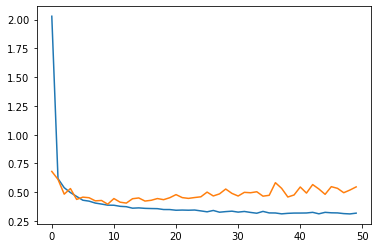

In [47]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [ ]:
d

In [ ]:
# image matrix 데이터를 vectorizing하지 말고, matrix 구조 그대로 학습 => CNN